In [ ]:
import src.pmcmc.main as pmcmc_main
import pandas as pd
import os
from src.utils import paths


loc_csv = os.path.join(paths.DATASETS_DIR, "locations.csv")
loc_df = pd.read_csv(loc_csv)

In [2]:
loc_codes = loc_df["location"]

In [6]:
print(loc_codes.values)

['US' '01' '02' '04' '05' '06' '08' '09' '10' '11' '12' '13' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '44' '45'
 '46' '47' '48' '49' '50' '51' '53' '54' '55' '56' '72']


In [8]:
for code in loc_codes.values:
    print("'", code, "',", sep="", end="")

'US','01','02','04','05','06','08','09','10','11','12','13','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','44','45','46','47','48','49','50','51','53','54','55','56','72',

In [9]:
from src.utils.location_codes import location_codes

In [11]:
location_codes[0]

'01'

In [16]:
!python -m src.scripts.all_locations_beta_test

Running Particle Filter:   1%|▏                 | 3/308 [00:16<26:43,  5.26s/it]^C
                                                                                Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-2:
Process ForkPoolWorker-6:
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/andrew/PycharmProjects/pmcmc_forecast/src/scripts/all_locations_beta_test.py", line 14, in <module>
    pool.map(run_pmcmc, location_codes)
  File "/usr/lib64/python3.12/multiprocessing/pool.py", line 367, in map
    return self._map_async(func, iterable, mapstar, chunksize).get()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/pool.py", line 768, in get
    self.wait(timeout)
  File "/usr/lib64/python3.12/multiprocessing/pool.py", line 765, in wait
    self._event.wait(timeout)
  File "/usr/lib64/python3.1

In [1]:
import os
import numpy as np
import pandas as pd
from src.utils import paths

locations = ["06", "08", "36", "47"]
target_dates = pd.read_csv("../datasets/target_dates.csv")

In [3]:
dates = target_dates["date"].values
dates

array(['2023-10-14', '2023-10-21', '2023-10-28', '2023-11-04',
       '2023-11-11', '2023-11-18', '2023-11-25', '2023-12-02',
       '2023-12-09', '2023-12-16', '2023-12-23', '2023-12-30',
       '2024-01-06', '2024-01-13', '2024-01-20', '2024-01-27',
       '2024-02-03', '2024-02-10', '2024-02-17', '2024-02-24',
       '2024-03-02', '2024-03-09', '2024-03-16', '2024-03-23',
       '2024-03-30', '2024-04-06', '2024-04-13', '2024-04-20',
       '2024-04-27'], dtype=object)

In [5]:
for loc in locations:
    print("Working location ", loc)
    base_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_run_20241013")
    loc_dir = os.path.join(base_dir, loc)
    beta_file_path = os.path.join(loc_dir, "mle_betas.csv")
    df = pd.read_csv(beta_file_path)

    # Average over the particles
    row_means = df.mean(axis=0)
    transposed_df = row_means.to_frame()
    num_rows = len(transposed_df)
    end_date = pd.to_datetime("2024-04-27")
    date_range = pd.date_range(end=end_date, periods=num_rows)
    transposed_df["date"] = date_range
    transposed_df.rename({0: "beta"}, axis="columns", inplace=True)

    df = transposed_df
    for target_date in target_dates["date"]:
        start_date = pd.to_datetime(target_date) - pd.Timedelta(days=50)
        filtered_df = df[(df["date"] > start_date) & (df["date"] <= target_date)]
        filtered_df.insert(0, "time_0", range(len(filtered_df)))
        filtered_df = filtered_df.drop(columns=["date"])
        file_path = os.path.join(paths.PF_OUTPUT_DIR, target_date, f"{loc}.csv")
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        filtered_df.to_csv(file_path, index=False)

Working location  06
Working location  08
Working location  36
Working location  47


### 2024-10-18
Want to extract particle filter hospitalizations for plotting.

In [3]:
import os
import pandas as pd
from src.utils import paths
import numpy as np

loc_code = "06"
base_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_run_20241013")
loc_dir = os.path.join(base_dir, loc_code)
mle_states_path = os.path.join(loc_dir, "mle_states.npy")

In [4]:
states_np = np.load(mle_states_path)

In [5]:
states_np

array([[[3.91949840e+07, 3.95372160e+07, 3.95370600e+07, ...,
         3.94401880e+07, 3.94407200e+07, 3.94420400e+07],
        [3.43240031e+05, 9.22093262e+02, 9.81386414e+02, ...,
         3.84720972e+03, 3.86312915e+03, 3.83477954e+03],
        [0.00000000e+00, 8.03718643e+01, 1.68497025e+02, ...,
         9.39607734e+04, 9.34166953e+04, 9.21222344e+04],
        [0.00000000e+00, 5.13011932e+00, 1.01467152e+01, ...,
         2.26399338e+02, 2.24817947e+02, 2.25609909e+02],
        [0.00000000e+00, 5.29791117e+00, 1.09298630e+01, ...,
         1.55921777e+04, 1.56151494e+04, 1.56383535e+04],
        [6.78476617e-02, 1.67397708e-01, 1.62726343e-01, ...,
         1.21046826e-01, 1.24216586e-01, 1.06166549e-01]],

       [[3.87853200e+07, 3.95372160e+07, 3.95370600e+07, ...,
         3.94401880e+07, 3.94407600e+07, 3.94415360e+07],
        [7.52904750e+05, 9.22093262e+02, 9.81386414e+02, ...,
         3.84720972e+03, 3.82498291e+03, 4.13000244e+03],
        [0.00000000e+00, 8.03718643e+0

In [10]:
new_h = states_np[:, 4, :]

In [11]:
new_h_df = pd.DataFrame(data=new_h)

In [12]:
new_h_df

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.0,5.297911,10.929863,16.787550,22.981297,29.556271,36.696815,44.117882,51.973549,60.327934,...,15433.669922,15452.415039,15471.317383,15503.485352,15525.238281,15547.184570,15569.375000,15592.177734,15615.149414,15638.353516
1,0.0,5.297911,10.929863,16.787550,22.976152,29.492123,36.513699,43.755272,51.327904,59.262436,...,15439.368164,15460.472656,15482.161133,15512.991211,15539.661133,15566.850586,15594.703125,15592.177734,15615.149414,15655.972656
2,0.0,5.297911,10.929863,16.815901,23.073662,29.720675,37.033207,44.770226,51.327904,59.262436,...,15436.422852,15461.307617,15487.210938,15512.878906,15539.661133,15566.850586,15594.908203,15624.349609,15654.629883,15612.379883
3,0.0,5.297911,10.929863,16.753069,22.905783,29.430199,36.557747,44.019714,53.065948,59.262436,...,15436.422852,15461.436523,15487.368164,15518.865234,15538.926758,15565.372070,15592.285156,15619.982422,15630.969727,15634.301758
4,0.0,5.297911,10.929863,16.772947,22.935802,29.446144,36.531960,43.877209,52.042053,62.008179,...,15438.959961,15464.782227,15491.794922,15516.084961,15538.926758,15565.372070,15605.713867,15606.028320,15625.149414,15539.549805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,23.098785,10.929863,16.803745,23.072256,29.790703,37.186989,44.320255,50.174843,57.585903,...,15244.520508,15263.635742,15296.976562,15318.732422,15340.177734,15361.591797,15382.935547,15404.444336,15417.406250,15437.379883
296,0.0,23.098785,10.929863,16.766062,22.945187,29.542902,36.751335,43.015190,50.174843,57.585903,...,15244.727539,15274.699219,15296.976562,15315.355469,15340.569336,15362.253906,15384.149414,15406.723633,15417.406250,15390.026367
297,0.0,23.098785,10.929863,16.778524,22.914042,29.301491,36.093243,43.015190,50.174843,57.585903,...,15252.836914,15274.699219,15294.985352,15266.936523,15335.781250,15356.136719,15376.493164,15397.084961,15369.959961,15390.026367
298,0.0,23.098785,10.929863,16.772902,22.963650,29.474945,36.519554,43.791637,51.407131,59.436440,...,15252.458984,15273.715820,15246.409180,15266.936523,15287.627930,15308.253906,15328.833008,15349.529297,15369.959961,15390.026367


In [15]:
# It is cumulative. Need to take daily difference.

daily_estimates_df = new_h_df.diff(axis=1)

In [17]:
daily_estimates_df

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.0,5.297911,5.631952,5.857687,6.193747,6.574974,7.140545,7.421066,7.855667,8.354385,...,69.976562,18.745117,18.902344,32.167969,21.752930,21.946289,22.190430,22.802734,22.971680,23.204102
1,0.0,5.297911,5.631952,5.857687,6.188602,6.515970,7.021576,7.241573,7.572632,7.934532,...,24.370117,21.104492,21.688477,30.830078,26.669922,27.189453,27.852539,-2.525391,22.971680,40.823242
2,0.0,5.297911,5.631952,5.886038,6.257761,6.647013,7.312532,7.737019,6.557678,7.934532,...,17.643555,24.884766,25.903320,25.667969,26.782227,27.189453,28.057617,29.441406,30.280273,-42.250000
3,0.0,5.297911,5.631952,5.823206,6.152714,6.524416,7.127548,7.461967,9.046234,6.196487,...,24.110352,25.013672,25.931641,31.497070,20.061523,26.445312,26.913086,27.697266,10.987305,3.332031
4,0.0,5.297911,5.631952,5.843084,6.162855,6.510342,7.085815,7.345249,8.164845,9.966125,...,26.647461,25.822266,27.012695,24.290039,22.841797,26.445312,40.341797,0.314453,19.121094,-85.599609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,23.098785,-12.168922,5.873882,6.268511,6.718447,7.396286,7.133266,5.854588,7.411060,...,19.545898,19.115234,33.340820,21.755859,21.445312,21.414062,21.343750,21.508789,12.961914,19.973633
296,0.0,23.098785,-12.168922,5.836199,6.179125,6.597715,7.208433,6.263855,7.159653,7.411060,...,18.929688,29.971680,22.277344,18.378906,25.213867,21.684570,21.895508,22.574219,10.682617,-27.379883
297,0.0,23.098785,-12.168922,5.848661,6.135517,6.387449,6.791752,6.921947,7.159653,7.411060,...,21.391602,21.862305,20.286133,-28.048828,68.844727,20.355469,20.356445,20.591797,-27.125000,20.066406
298,0.0,23.098785,-12.168922,5.843039,6.190748,6.511295,7.044609,7.272083,7.615494,8.029308,...,21.142578,21.256836,-27.306641,20.527344,20.691406,20.625977,20.579102,20.696289,20.430664,20.066406


In [47]:
# Get true hospitalization data

file_path = os.path.join(paths.DATASETS_DIR, "hosp_data", "hosp_06.csv")
all_hosp_data = pd.read_csv(file_path)
subset_df = all_hosp_data[
    (all_hosp_data["date"] <= "2024-04-27") & (all_hosp_data["date"] >= "2023-06-25")
]
subset_df

,Unnamed: 0,date,state,previous_day_admission_influenza_confirmed
1216,81696,2023-06-25,CA,1.0
1217,78429,2023-06-26,CA,9.0
1218,77220,2023-06-27,CA,9.0
1219,75552,2023-06-28,CA,8.0
1220,79361,2023-06-29,CA,6.0
...,...,...,...,...
1519,67789,2024-04-23,CA,24.0
1520,69694,2024-04-24,CA,23.0
1521,65916,2024-04-25,CA,23.0
1522,61605,2024-04-26,CA,14.0


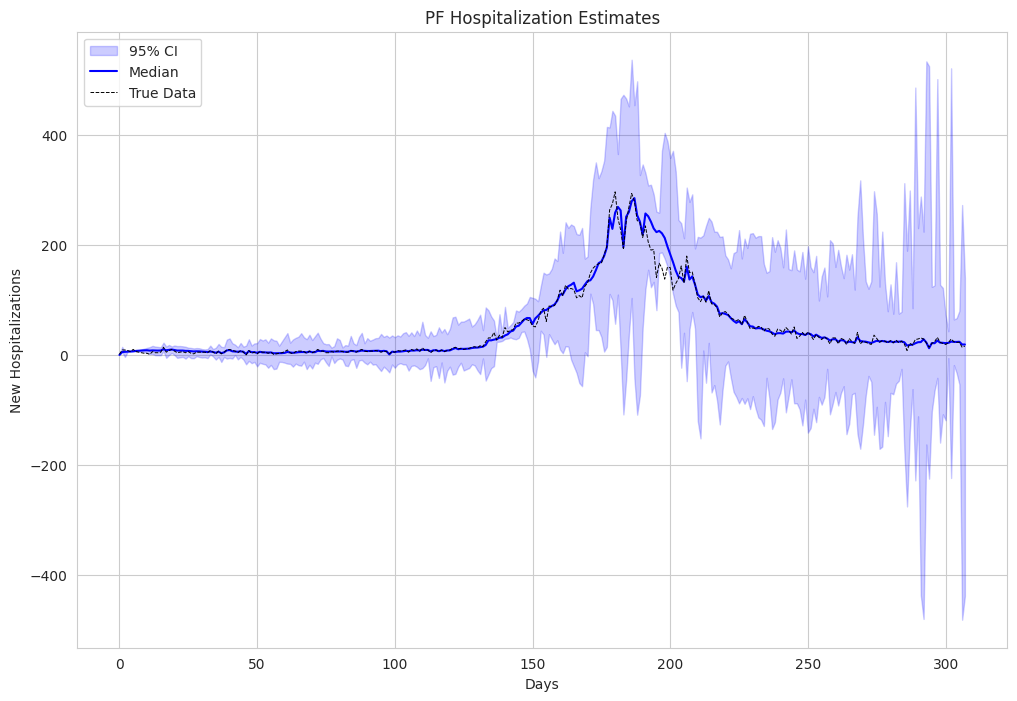

In [55]:
import matplotlib.pyplot as plt


quantiles = daily_estimates_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(12, 8))
plt.fill_between(
    range(daily_estimates_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(
    range(daily_estimates_df.shape[1]), quantiles.loc[0.5], color="b", label="Median"
)
plt.plot(
    range(daily_estimates_df.shape[1]),
    subset_df["previous_day_admission_influenza_confirmed"],
    color="black",
    label="True Data",
    lw=0.7,
    ls="--",
)
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("PF Hospitalization Estimates")
plt.legend()
plt.show()

In [57]:
truth_6mo_df = subset_df[
    (subset_df["date"] <= "2024-04-27") & (subset_df["date"] >= "2023-10-01")
]
truth_6mo_df

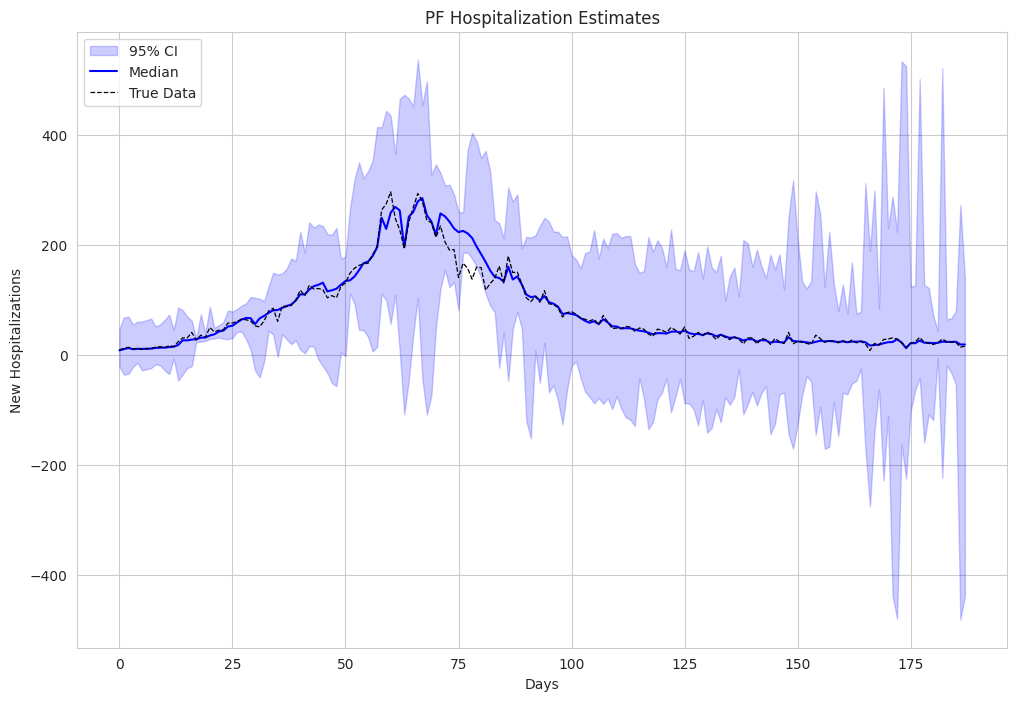

In [59]:
import matplotlib.pyplot as plt

# Plotting

quantiles = daily_estimates_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(12, 8))
plt.fill_between(
    range(308 - 120),
    quantiles.loc[0.025][120:],
    quantiles.loc[0.975][120:],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(range(308 - 120), quantiles.loc[0.5][120:], color="b", label="Median")
plt.plot(
    range(308 - 120),
    subset_df["previous_day_admission_influenza_confirmed"][120:],
    color="black",
    label="True Data",
    lw=0.9,
    ls="--",
)
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("PF Hospitalization Estimates")
plt.legend()
plt.show()

In [33]:
susc_df = pd.DataFrame(states_np[:, 0, 1:])

In [34]:
quantiles = susc_df.quantile([0.025, 0.5, 0.975], axis=0)
print(susc_df.shape[1])
quantiles.loc[0.025]

307


0      39535319.7
1      39537052.0
2      39536888.0
3      39536693.9
4      39536468.0
          ...    
302    39434212.2
303    39433875.6
304    39436698.8
305    39437908.3
306    39439832.3
Name: 0.025, Length: 307, dtype: float64

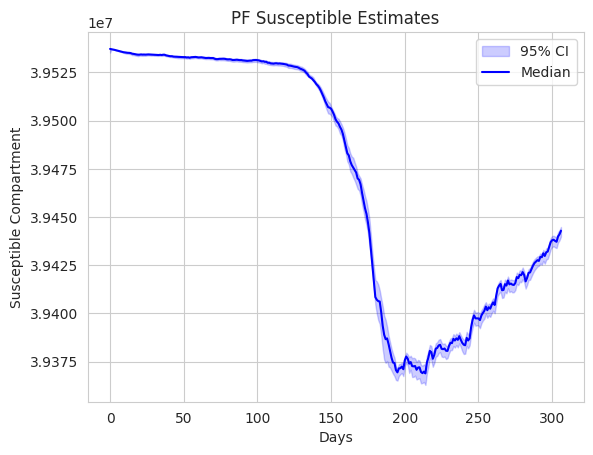

In [35]:
plt.fill_between(
    range(susc_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(range(susc_df.shape[1]), quantiles.loc[0.5], color="b", label="Median")
plt.xlabel("Days")
plt.ylabel("Susceptible Compartment")
plt.title("PF Susceptible Estimates")
plt.legend()
plt.show()

In [37]:
infected_df = pd.DataFrame(states_np[:, 1, 1:])

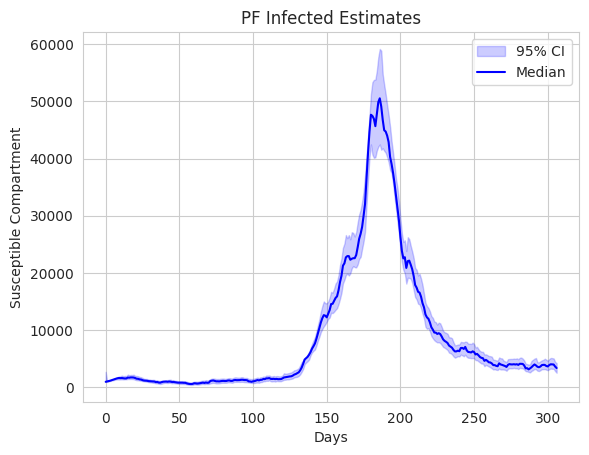

In [39]:
quantiles = infected_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.fill_between(
    range(infected_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(range(infected_df.shape[1]), quantiles.loc[0.5], color="b", label="Median")
plt.xlabel("Days")
plt.ylabel("Susceptible Compartment")
plt.title("PF Infected Estimates")
plt.legend()
plt.show()

In [1]:
# 2024-10-22
# Testing beta quantiles / plotting
import os
import pandas as pd
import numpy as np
from src.utils import paths

betas_path = os.path.join(
    paths.OUTPUT_DIR, "pmcmc_runs", "06", "mle_betas_20241020.csv"
)

In [2]:
betas_df = pd.read_csv(betas_path)
betas_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,298,299,300,301,302,303,304,305,306,307
0,0,0.001000,0.016043,0.011372,0.012201,0.006215,0.006916,0.008229,0.007923,0.006292,...,0.097213,0.096783,0.093215,0.092687,0.089172,0.088208,0.094847,0.105092,0.108262,0.106439
1,1,0.039110,0.021177,0.010487,0.003550,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.103714,0.105364,0.108150,0.103993,0.103351,0.105775,0.112202,0.112498,0.101985,0.100875
2,2,0.038900,0.009799,0.017199,0.012854,0.020153,0.025747,0.022210,0.025239,0.028240,...,0.102310,0.102872,0.107620,0.112538,0.119513,0.118657,0.125494,0.132155,0.136414,0.095562
3,3,0.007676,0.013399,0.010581,0.011064,0.012563,0.014577,0.025166,0.001000,0.001000,...,0.092772,0.085922,0.089049,0.094958,0.101375,0.101326,0.089871,0.120852,0.098048,0.093598
4,4,0.003393,0.018971,0.008707,0.007035,0.008562,0.004233,0.001000,0.023045,0.019408,...,0.119064,0.082046,0.079308,0.086859,0.083652,0.077500,0.093336,0.094115,0.091007,0.095045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.001210,0.027484,0.022168,0.037532,0.036018,0.035261,0.041943,0.043285,0.047974,...,0.107676,0.092257,0.100469,0.100287,0.101257,0.095484,0.095763,0.097593,0.101055,0.107550
296,296,0.009102,0.027911,0.024521,0.023244,0.017535,0.022528,0.015168,0.012631,0.008172,...,0.110737,0.104434,0.097773,0.102084,0.133128,0.136837,0.141973,0.141002,0.113806,0.097568
297,297,0.007725,0.036750,0.012478,0.010897,0.002944,0.005910,0.002600,0.001000,0.001000,...,0.124970,0.111303,0.122841,0.122197,0.115447,0.127755,0.138317,0.132503,0.087015,0.113883
298,298,0.016542,0.027202,0.022718,0.013425,0.013146,0.010890,0.007608,0.009826,0.001546,...,0.112734,0.113614,0.111571,0.117887,0.115212,0.106727,0.135240,0.128433,0.099673,0.090536


In [3]:
betas_df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
betas_df = betas_df.T

In [5]:
quantiles = betas_df.quantile([0.025, 0.16, 0.5, 0.84, 0.975], axis=1)

In [6]:
quantiles

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0.025,0.001000,0.010119,0.005720,0.002712,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.072134,0.070122,0.062758,0.063005,0.067375,0.068741,0.066095,0.063728,0.050450,0.042927
0.160,0.007081,0.013576,0.011604,0.010632,0.008677,0.009812,0.009117,0.007885,0.008049,0.006877,...,0.086070,0.083852,0.079620,0.077115,0.082086,0.080517,0.082143,0.081252,0.070892,0.066318
0.500,0.026421,0.018586,0.018055,0.018416,0.019177,0.019915,0.020306,0.021096,0.022057,0.022791,...,0.103394,0.099670,0.096304,0.096368,0.100566,0.101034,0.099202,0.097624,0.090328,0.083203
0.840,0.042491,0.023883,0.024818,0.026928,0.028613,0.030951,0.032423,0.033509,0.034920,0.036056,...,0.119508,0.118200,0.113965,0.111663,0.116882,0.116160,0.116067,0.116702,0.107466,0.102647
0.975,0.052474,0.030077,0.032106,0.034707,0.037756,0.040231,0.043561,0.044655,0.045424,0.048017,...,0.136206,0.131955,0.131185,0.132412,0.136556,0.136062,0.134994,0.134578,0.125617,0.117313


In [8]:
quantiles = quantiles.T

In [9]:
start_date = pd.to_datetime("2023-06-25")
full_date_range = pd.date_range(start=start_date, periods=quantiles.shape[0], freq="D")

In [10]:
quantiles["date"] = full_date_range
quantiles

,0.025,0.16,0.5,0.84,0.975,date
0,0.001000,0.007081,0.026421,0.042491,0.052474,2023-06-25
1,0.010119,0.013576,0.018586,0.023883,0.030077,2023-06-26
2,0.005720,0.011604,0.018055,0.024818,0.032106,2023-06-27
3,0.002712,0.010632,0.018416,0.026928,0.034707,2023-06-28
4,0.001000,0.008677,0.019177,0.028613,0.037756,2023-06-29
...,...,...,...,...,...,...
303,0.068741,0.080517,0.101034,0.116160,0.136062,2024-04-23
304,0.066095,0.082143,0.099202,0.116067,0.134994,2024-04-24
305,0.063728,0.081252,0.097624,0.116702,0.134578,2024-04-25
306,0.050450,0.070892,0.090328,0.107466,0.125617,2024-04-26
